In [5]:
import sys, math, os
from skimage import data, io, filters, color, img_as_ubyte, transform, img_as_float
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from collections import defaultdict
from scipy import misc

Part 1

In [6]:
def transformIntensity(im, K1, K2, a, b):
    chan = 3 if len(im.shape) == 3 else 1
    im = img_as_float(im)
    trans_im = np.zeros(im.shape)
    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            if chan == 3:
                for i in range(chan):
                    z = im[x][y][i]
                    
                    if z <= b[i] and z >= a[i]:
                        trans_im[x][y][i] = K1[i]*z + K2[i]
                        trans_im[x][y][i] = max(0., trans_im[x][y][i])
                        trans_im[x][y][i] = min(1., trans_im[x][y][i])
                    else:
                        trans_im[x][y][i] = z
            else:
                z = im[x][y]
                
                if z <= b and z >= a:
                    trans_im[x][y] = K1*z + K2
                    trans_im[x][y] = max(0., trans_im[x][y])
                    trans_im[x][y] = min(1., trans_im[x][y])
                else:
                    trans_im[x][y] = z
    return img_as_ubyte(trans_im)

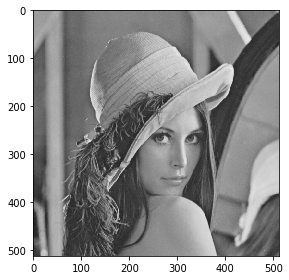

In [7]:
im = imread("./A1_resources/Q3/lena.bmp")
img = transformIntensity(im, 1, 0, 0, 255)
imshow(im)

Part 2  
  
a) $g(z) = z + 0.25, a = 0 <= z <= b = 1$  
b) $g(z) = 4/3 * z - 1/3, a = 0 <= z <= b = 1$  
c) $g(z) =  2 * z - 0.5, a = 0 <= z <= b = 1$  
d) $g(z) = z, a = 0.25 <= z <= b = 0.75$  
          $0, otherwise$  
e) $g(z) = 0.25, 0 <= x < 0.25$  
          $0.5, 0.25 <= x < 0.5$  
          $0.75, 0.5 <= x < 0.75$  
          $1.0, 0.75 <= x <= 1.0$  

In [8]:
def functionA(im):
    channels = 3 if len(im.shape) == 3 else 1
    return transformIntensity(im, 1, 0.25, 0., 1.)

def functionB(im):
    channels = 3 if len(im.shape) == 3 else 1
    return transformIntensity(im, 4.0/3, -1.0/3, 0., 1.)

def functionC(im):
    channels = 3 if len(im.shape) == 3 else 1
    return transformIntensity(im, 2, -1.0/2, 0., 1.)

def functionD(im):
    channels = 3 if len(im.shape) == 3 else 1
    im = transformIntensity(im, 0., 0., 0., 0.25)
    im = transformIntensity(im, 0.,0.,0.75, 1.0)
    return im

def functionE(im):
    channels = 3 if len(im.shape) == 3 else 1
    im = transformIntensity(im, 0., 1., 0.75, 1.0)
    im = transformIntensity(im, 0., 0.75, 0.5, 0.75)
    im = transformIntensity(im, 0., 0.5, 0.25, 0.5)
    im = transformIntensity(im, 0., 0.25, 0., 0.25)
    return im

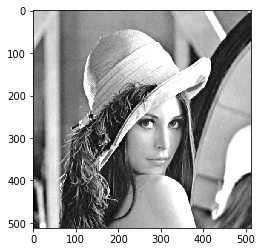

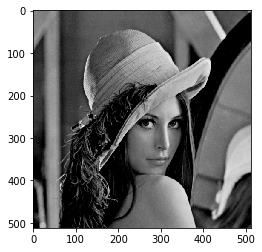

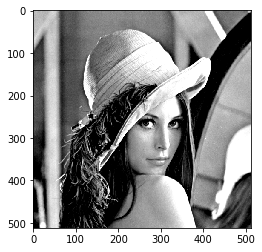

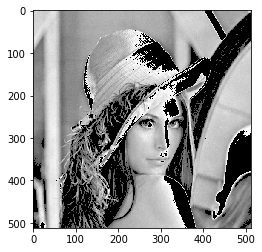

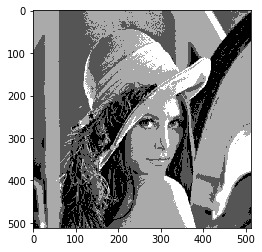

In [9]:
lena = io.imread("./A1_resources/Q3/lena.bmp")
lenaA = functionA(lena)
lenaB = functionB(lena)
lenaC = functionC(lena)
lenaD = functionD(lena)
lenaE = functionE(lena)

plt.figure()
plt.imshow(lenaA, cmap = "gray")
plt.figure()
plt.imshow(lenaB, cmap = "gray")
plt.figure()
plt.imshow(lenaC, cmap = "gray")
plt.figure()
plt.imshow(lenaD, cmap = "gray")
plt.figure()
plt.imshow(lenaE, cmap = "gray")

In [13]:
def functionF(im):
    channels = 3 if len(im.shape) == 3 else 1
    im = transformIntensity(im, [0.,0.,0.], [0.5,0.5,0.5],[0.,0.,0.], [0.5,0.5,0.5])
    im = transformIntensity(im, [-1.0,-1.0,-1.0], [1.0,1.0,1.0], [0.5,0.5,0.5], [1.0,1.0,1.0])
    return im

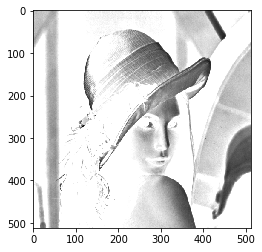

In [11]:
lena = imread("./A1_resources/Q3/lena.bmp")
lenaF = functionF(lena)

plt.figure()
plt.imshow(lenaF, cmap = "gray")

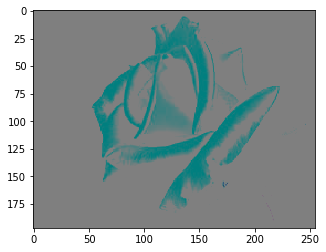

In [14]:
rose = imread("./A1_resources/rose.jpeg")
roseF = functionF(rose)

plt.figure()
plt.imshow(roseF)